<a href="https://colab.research.google.com/github/amandatz/computational-linear-algebra/blob/main/Atividade4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 4

Amanda Topanotti Zanette (22100776)

**Importações e funções auxiliares**

In [1]:
using LinearAlgebra
using Plots, Printf

function print_matrix(M, decimals::Int=4)
  for i in 1:size(M, 1)
    for j in 1:size(M, 2)
      @printf("%*.*f ", 10, decimals, M[i, j])
    end
    println()
  end
end

print_matrix (generic function with 2 methods)

Esse trecho de código é usado apenas para garantir a repetibilidade dos números aleatórios gerados.

In [2]:
using Random
Random.seed!(123)

TaskLocalRNG()

## Parte 1

### Questão 1

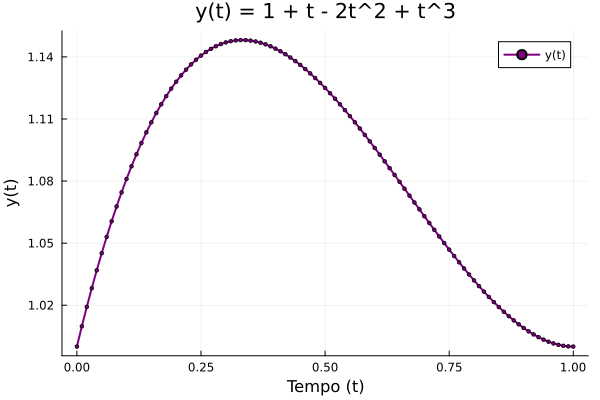

In [3]:
y(t) = 1 + t - 2t^2 + t^3

t_values = range(0, 1, length=101)

y_values = y.(t_values)

plot(t_values, y_values,
      title="y(t) = 1 + t - 2t^2 + t^3",
      xlabel="Tempo (t)",
      ylabel="y(t)",
      label="y(t)",
      marker=:circle,
      color=:purple,
      markersize=2,
      linewidth=2)


### Questão 2

In [4]:
epsilon = 1e-2 * randn(length(t_values))
y_noisy = y_values + epsilon

101-element Vector{Float64}:
 1.0080828792846497
 0.9985802749188583
 1.0081616389767072
 1.0240570736483507
 1.0397398798062385
 1.0474231869805188
 1.048798313356003
 1.046987093788988
 1.068406591410919
 1.073355771954692
 1.0931928150973196
 1.0900601433452246
 1.0926165186965073
 ⋮
 1.0120784190429168
 1.0086829276964975
 1.0117210147764386
 1.0142909511272877
 1.0083475112039393
 1.002297750459509
 0.9955872523849887
 0.9906538148606371
 1.007910583257923
 1.0018252589323753
 1.001582753666761
 1.0100961341373513

### Questão 3

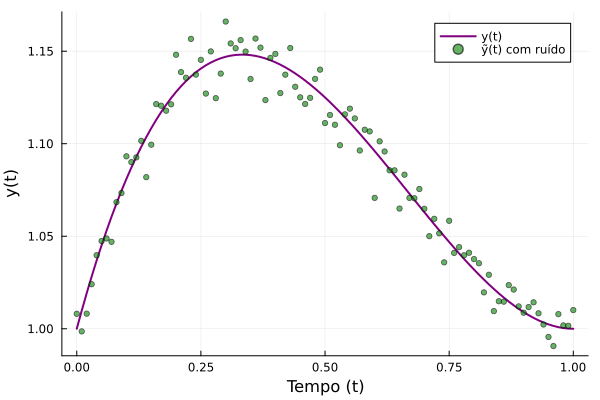

In [5]:
p1 = plot(t_values, y_values,
      xlabel="Tempo (t)",
      ylabel="y(t)",
      label="y(t)",
      color=:purple,
      linewidth=2)

scatter!(p1, t_values, y_noisy,
         label="ỹ(t) com ruído",
         markersize=3,
         color=:green,
         alpha=0.6)


### Questão 4

A matriz $A \in \mathbb{R}^{m\times4}$ tem posto igual a 4, ou seja, $A$ tem posto completo.

In [6]:
A = [ones(length(t_values)) t_values t_values.^2 t_values.^3]
b = copy(y_noisy)

rank_A = rank(A)

print("posto(A) = ",rank_A)

posto(A) = 4

### Questão 5

Estarei utilizando a decomposição QR para resolver a questão. A solução do sistema $Ax = QRx = b$ será encontrada a partir de $Rx=Q^Tb$. Nesse caso,
$$
r_{i,i} x_i + r_{i,i+1} x_{i+1} + \cdots + r_{i,n} x_n = Q_b[i]
$$
em que $r_{i,i}$ é elemento de $R$, $x_{i}$ elemento de $x$ e $Q_b[i]$ é a $i$-ésima entrada do vetor $Q^Tb$. Assim,
$$
x_i = \frac{Q_b[i] - \sum_{j=i+1}^n r_{ij} x_j}{r_{ii}}
$$

In [13]:
Q, R = qr(A)
Q_b = Q' * b

n = size(R, 1)
x = zeros(n)

for i = n:-1:1
    x[i] = (Q_b[i] - sum(R[i, i+1:end] .* x[i+1:end])) / R[i, i]
end

println("Solução x': ")
print_matrix(x)

Solução x': 
    0.9981 
    1.0162 
   -2.0489 
    1.0388 


A solução é única pois $A$ tem posto completo e, portanto, a matriz $R$ da decomposição $QR$ será inversível.

### Questão 6

In [15]:
p = [1; 1; -2; 1]

norm(x-p)

0.06453837728292483

### Questão 7

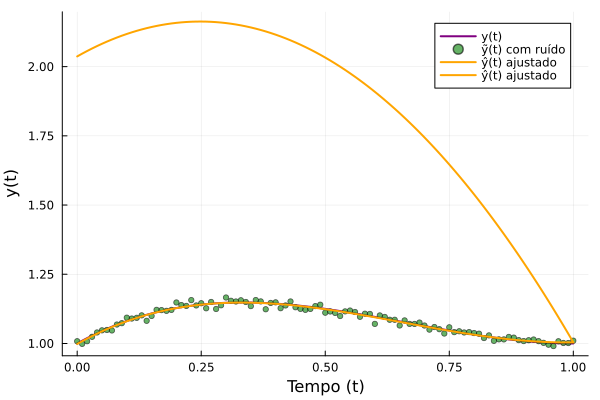

In [18]:
y_hat = x[1] .+ x[2] .* t_values .+ x[3] .* t_values.^2 .+ x[4] .* t_values.^3

plot!(p1, t_values, y_hat,
      label="ŷ(t) ajustado",
      color=:orange,
      linewidth=2)

## Parte 2

### Questão 1
